# Chapter 24: Improvement & its principles

For additional context see chapter 24 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [6]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## The principles of improvement

Intentional alterations to a process, i.e. improvements, are always made in the context of three guiding principles: The Purpose Principle, The Knowledge Principle, and The Revision Principle.

The **Purpose Principle** states that *any alterations to a process must be made in service of an aim.*

The **Knowledge Principle** states that *knowledge of the sources of variation that influence a process is only gained through incremental change.*

The **Revision Principle** states that *when the effect of an alteration to a process has yet to be quantified and understood, the alteration should be made such that it is reversible.*

## Get Vienna General data

In [7]:
# Vienna General dataset url
vienna_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/24-improvement-at-vienna-general-data.csv'

# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
ratio_df = get_data(vienna_url)

# Drop 'Notes' column
ratio_df.drop(columns='Notes')
# Make 'Year' column dtype string
ratio_df['Year'] = ratio_df['Year'].astype('string')

# Show head of df
ratio_df.head()

,Hospital,Clinic,Stage,Year,Births,Deaths,Death-to-Birth Ratio,Notes
0,Vienna General,Both,Before pathological anatomy,1784,284,6,2.1,No pathological anatomy
1,Vienna General,Both,Before pathological anatomy,1785,899,13,1.4,NaN
2,Vienna General,Both,Before pathological anatomy,1786,1151,5,0.4,NaN
3,Vienna General,Both,Before pathological anatomy,1787,1407,5,0.4,NaN
4,Vienna General,Both,Before pathological anatomy,1788,1425,5,0.4,NaN


### Get unique stages in dataset

In [13]:
# Get unique stages
stage_list = ratio_df['Stage'].unique().tolist()

# Create dataframe list
vienna_df_list = []
for stage in stage_list:
    stage_df = ratio_df[ratio_df['Stage'] == stage].reset_index(drop=True)
    vienna_df_list.append(stage_df)

,Hospital,Clinic,Stage,Year,Births,Deaths,Death-to-Birth Ratio,Notes
0,Vienna General,2nd Clinic,Only female students,1841,2442,86,3.50,NaN
1,Vienna General,2nd Clinic,Only female students,1842,2659,202,7.50,NaN
2,Vienna General,2nd Clinic,Only female students,1843,2739,164,5.90,NaN
3,Vienna General,2nd Clinic,Only female students,1844,2956,68,2.30,NaN
4,Vienna General,2nd Clinic,Only female students,1845,3241,66,2.03,NaN
5,Vienna General,2nd Clinic,Only female students,1846,3754,105,2.70,NaN


## Fig 24.5: XmR Chart of Vienna General ratios after pathological anatomy began

Select Vienna General data from 1823 to 1840. This window defines after pathological anatomy began until the 

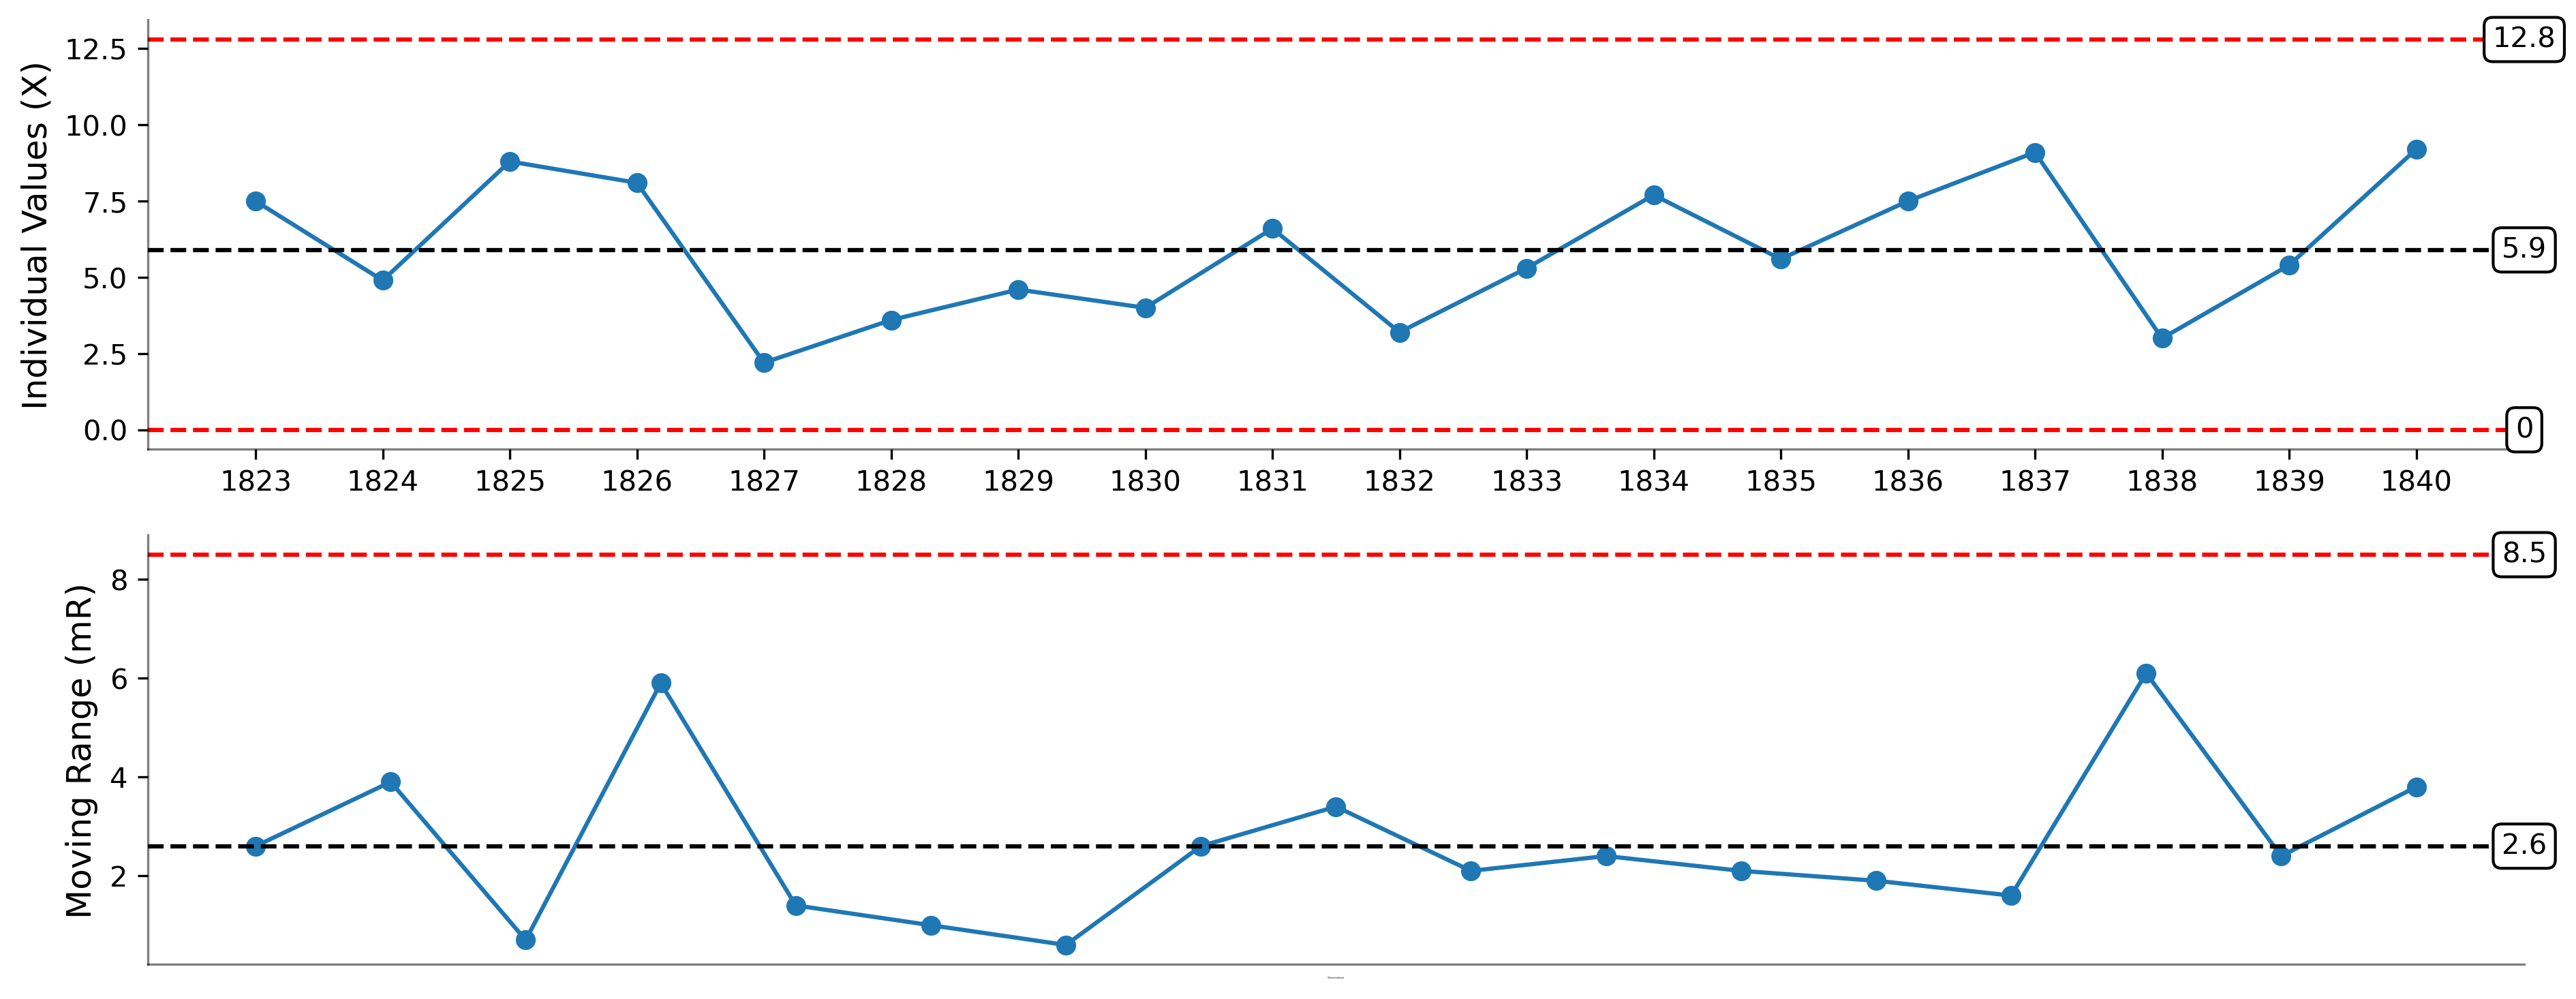

In [9]:
# XmR chart of death-to-birth ratios after pathological anatomy began
xmr_after_pa_results = xmr.xmrchart(vienna_df_list[1], 
                                    'Death-to-Birth Ratio', 
                                    'Year', 
                                    tickinterval=1, 
                                    round_value=1)

In [10]:
# Show results from after pathological anatomy XmR Chart
xmr_after_pa_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X-Chart,Mean,5.9
1,X-Chart,UPL,12.8
2,X-Chart,LPL,0.0
3,X-Chart,PLR,12.8
4,mR-Chart,Ave. mR,2.6
5,mR-Chart,URL,8.5


## Fig 24.7: X Chart portion

In [16]:
vienna_list = [vienna_df_list[1], vienna_df_list[3], vienna_df_list[4]]

vienna_df_labels = ['After pathological anatomy',
                    'First clinic - Only male students', 
                    'Second clinc - Only female students']

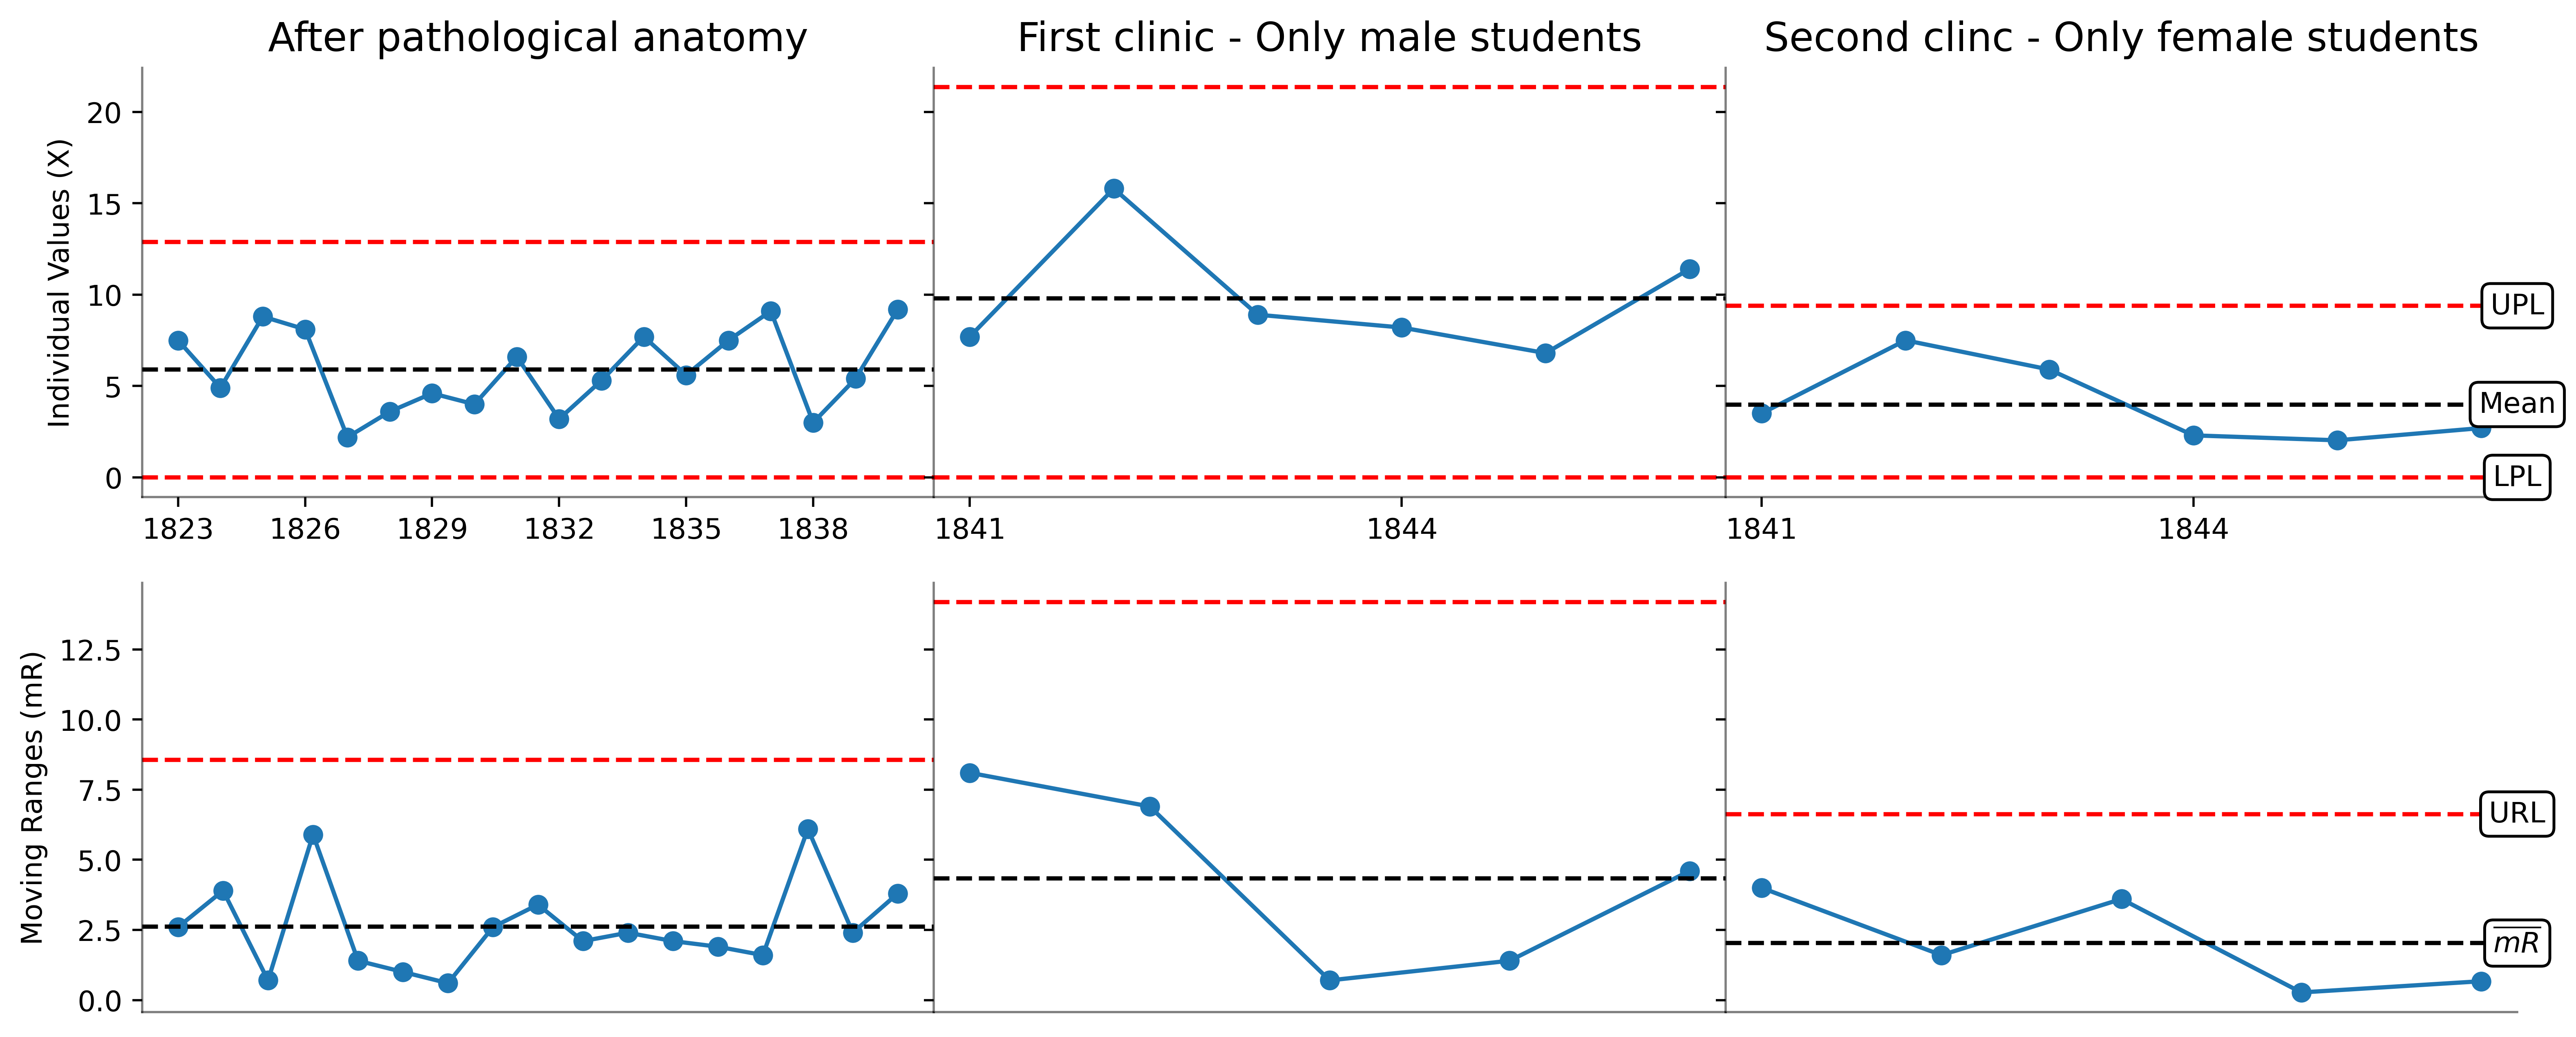

In [20]:
xmr_vienna_results = cc.xmr_comparison(vienna_list, 
                                         'Death-to-Birth Ratio', 
                                         'Year',
                                         vienna_df_labels, 
                                         tickinterval=3)

In [21]:
# Show comparison results
xmr_vienna_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,After pathological anatomy,5.91,2.62,12.8792,0,8.56,12.8792,Predictable
1,First clinic - Only male students,9.80,4.34,21.3444,0,14.18,21.3444,Predictable
2,Second clinc - Only female students,3.99,2.03,9.3898,0,6.63,9.3898,Predictable


## Fig 24.8: Bar chart of means and upper process limits

In [22]:
xmr_vienna_results = round(xmr_vienna_results[['Label','Mean','UPL']],3)
# Transpose xchart_comparison
xmr_vienna_results_T = xmr_vienna_results.T
# Make first row column labels
xmr_vienna_results_T.columns = xmr_vienna_results_T.iloc[0]
xmr_vienna_results_T = xmr_vienna_results_T[1:]
# Stack xchart_comparison_T
xmr_vienna_results_T = (xmr_vienna_results_T
                             .stack()
                             .to_frame()
                             .reset_index()
                             .rename(columns={'level_0':'Statistic',0:'Value'})
                            )
# Show results
xmr_vienna_results_T

,Statistic,Label,Value
0,Mean,After pathological anatomy,5.91
1,Mean,First clinic - Only male students,9.8
2,Mean,Second clinc - Only female students,3.99
3,UPL,After pathological anatomy,12.879
4,UPL,First clinic - Only male students,21.344
5,UPL,Second clinc - Only female students,9.39


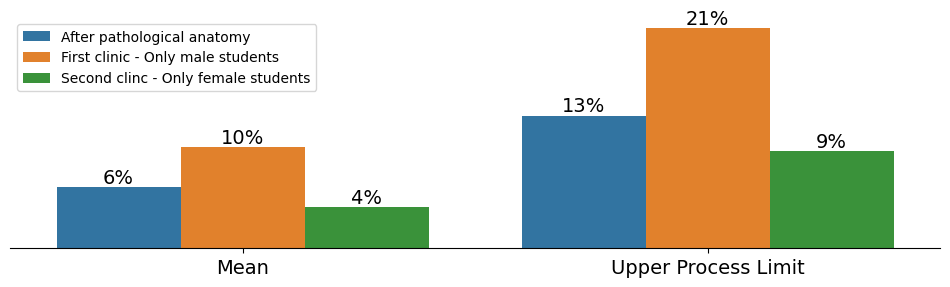

In [26]:
# Creat figure ans ax
fig, ax = plt.subplots(figsize=(12,3))

# Plot dat in bar chart
sns.barplot(data=xmr_vienna_results_T, 
            x='Statistic', 
            y='Value', 
            hue='Label')

# Annotate each bar with its value
for container in axes.containers:
    ax.bar_label(container, fmt='%.f%%', fontsize=14)  # Formats values to one decimal place

# Remove legend title
legend = plt.legend(title="")
# Remove axis labels
plt.xlabel('')
plt.ylabel('')
# Remove yaxis ticks
ax.yaxis.set_ticks([])
# Create new labels for xaxis
new_labels = ['Mean', 'Upper Process Limit']
# Apply new labels to xaxis
ax.xaxis.set_ticklabels(new_labels, fontsize=14)
# Despine figure
sns.despine(left=True)
# Show plot
plt.show()

## Fig 24.9: XmR Chart of Last Year's Realized Cash Ratios

In [138]:
# Get realized cash ratio data
rcr_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/24-anscombe-health-realized-cash-ratio-data.csv'

# Get data
rcr_df = get_data(rcr_url)
# Drop unnamed column
rcr_df = rcr_df.drop(columns='Unnamed: 0')
# Set 'Month' column as dtype string
rcr_df['Month'] = rcr_df['Month'].astype('string')
rcr_df

,Month,Last Year,This Year
0,Jan,84.6,92.8
1,Feb,78.3,95.8
2,Mar,75.7,94.5
3,Apr,63.7,95.7
4,May,82.2,95.1
5,Jun,88.4,95.6
6,Jul,89.8,94.3
7,Aug,84.7,95.7
8,Sep,82.8,94.2
9,Oct,83.4,92.2


### Create Last Year df and This Year df

In [139]:
# Create last year
last_year = (rcr_df[['Month', 'Last Year']]
             .rename(columns={'Last Year':'RCR'})
            )

# Create this year
this_year = (rcr_df[['Month', 'This Year']]
             .rename(columns={'This Year':'RCR'})
            )

## Fig 24.9: XmR Chart of realized cash ratios last year

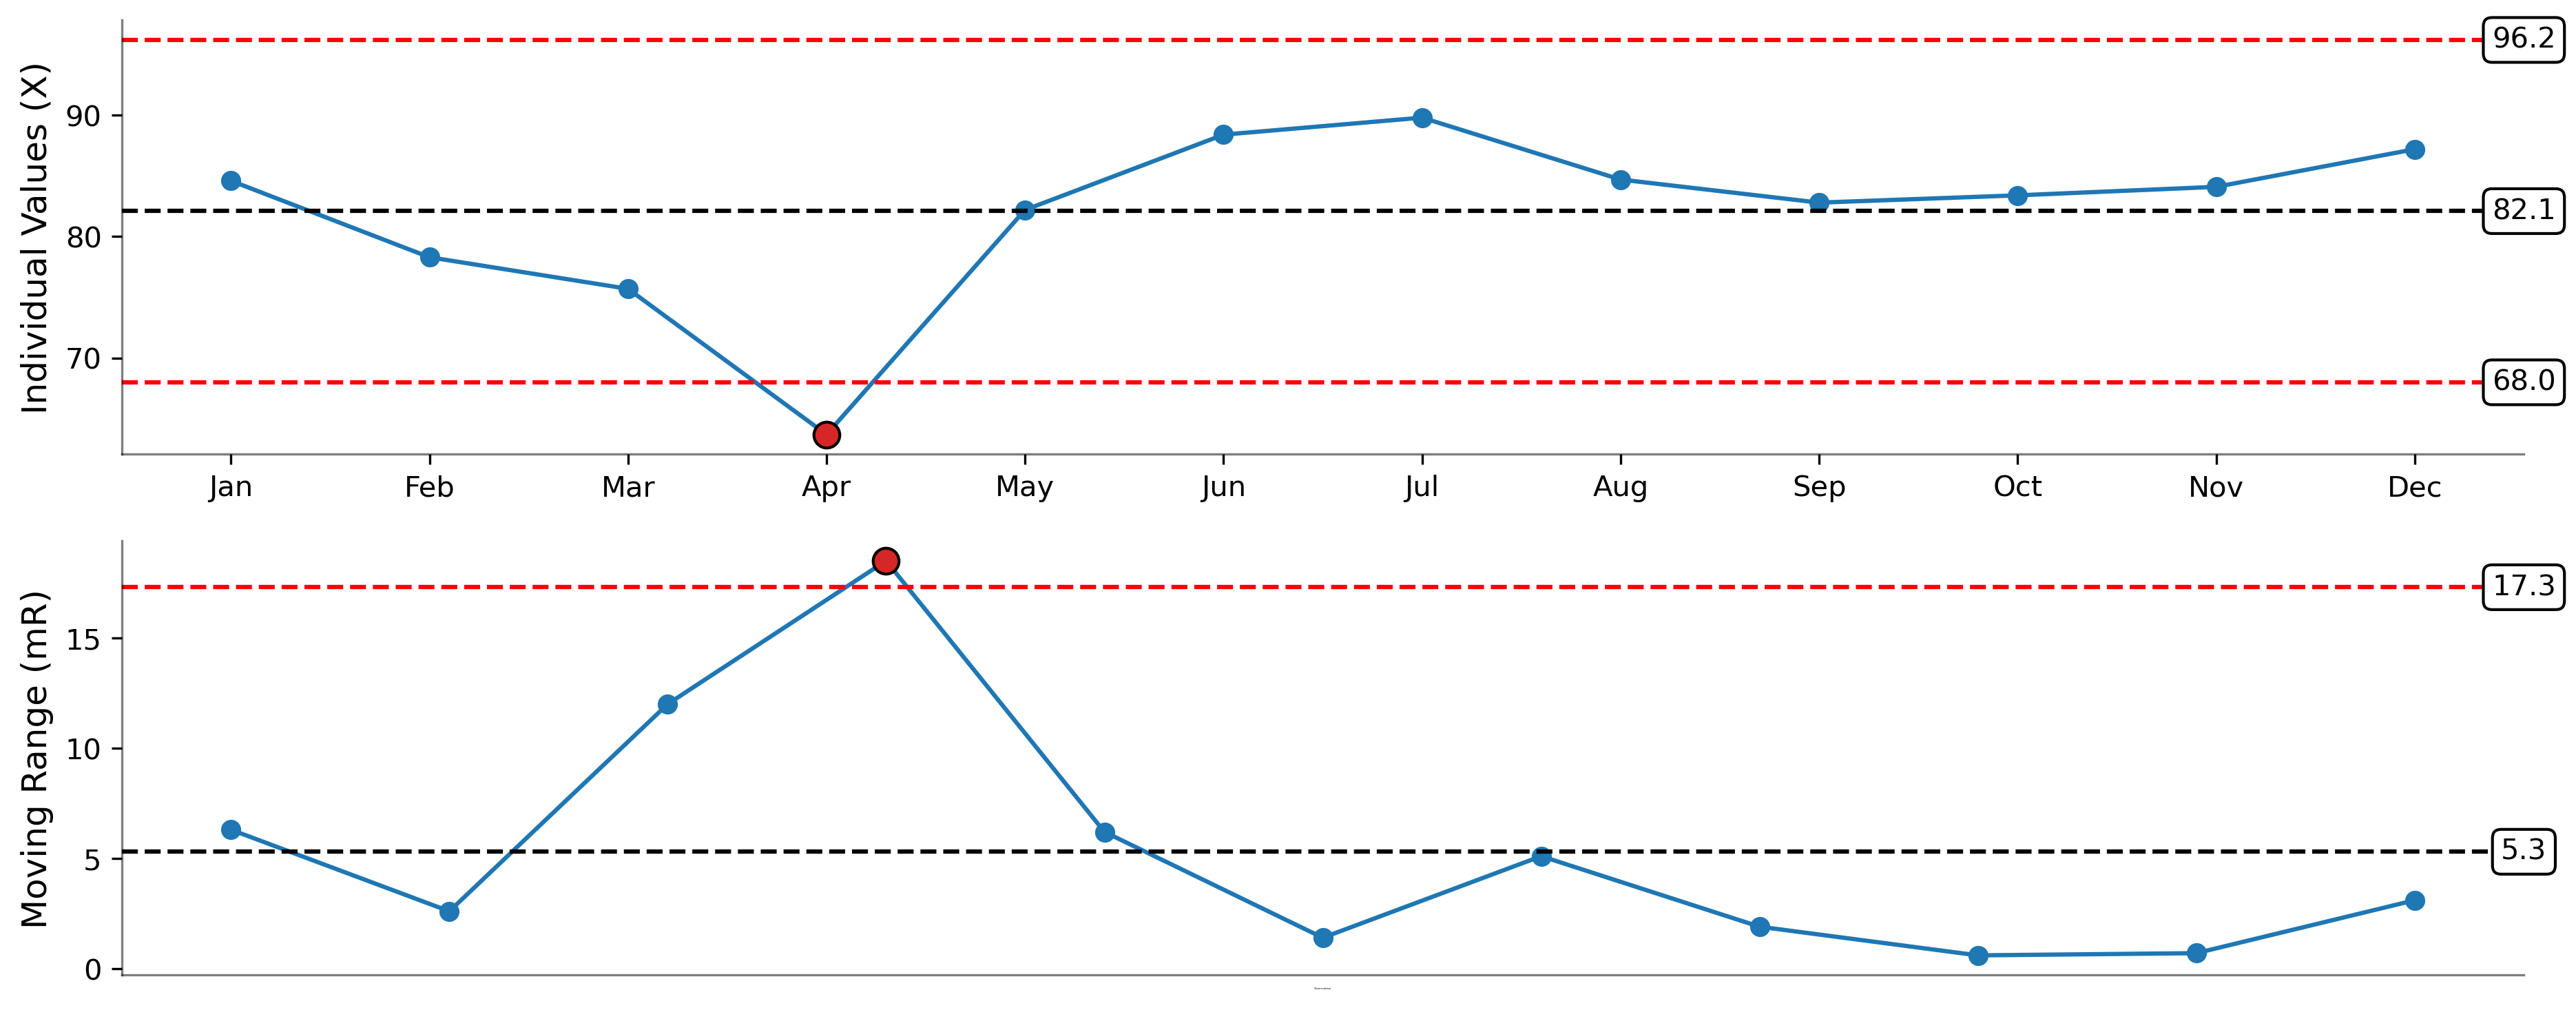

In [140]:
rcr_xmr_results = xmr.xmrchart(last_year, 'RCR', 'Month', round_value=1)

In [141]:
# Show results
rcr_xmr_results['XmR Chart Statistics']

,Chart,PBC Params,Param Values
0,X-Chart,Mean,82.1
1,X-Chart,UPL,96.2
2,X-Chart,LPL,68.0
3,X-Chart,PLR,28.2
4,mR-Chart,Ave. mR,5.3
5,mR-Chart,URL,17.3


## Fig 24.10: XmR Charts comparing Last Year and This Year

In [142]:
# Make list of Realized Cash Ratio dataframes
rcr_df_list = [last_year, this_year]
# Create list of labels
rcr_labels_list = ['Last Year', 'This Year']

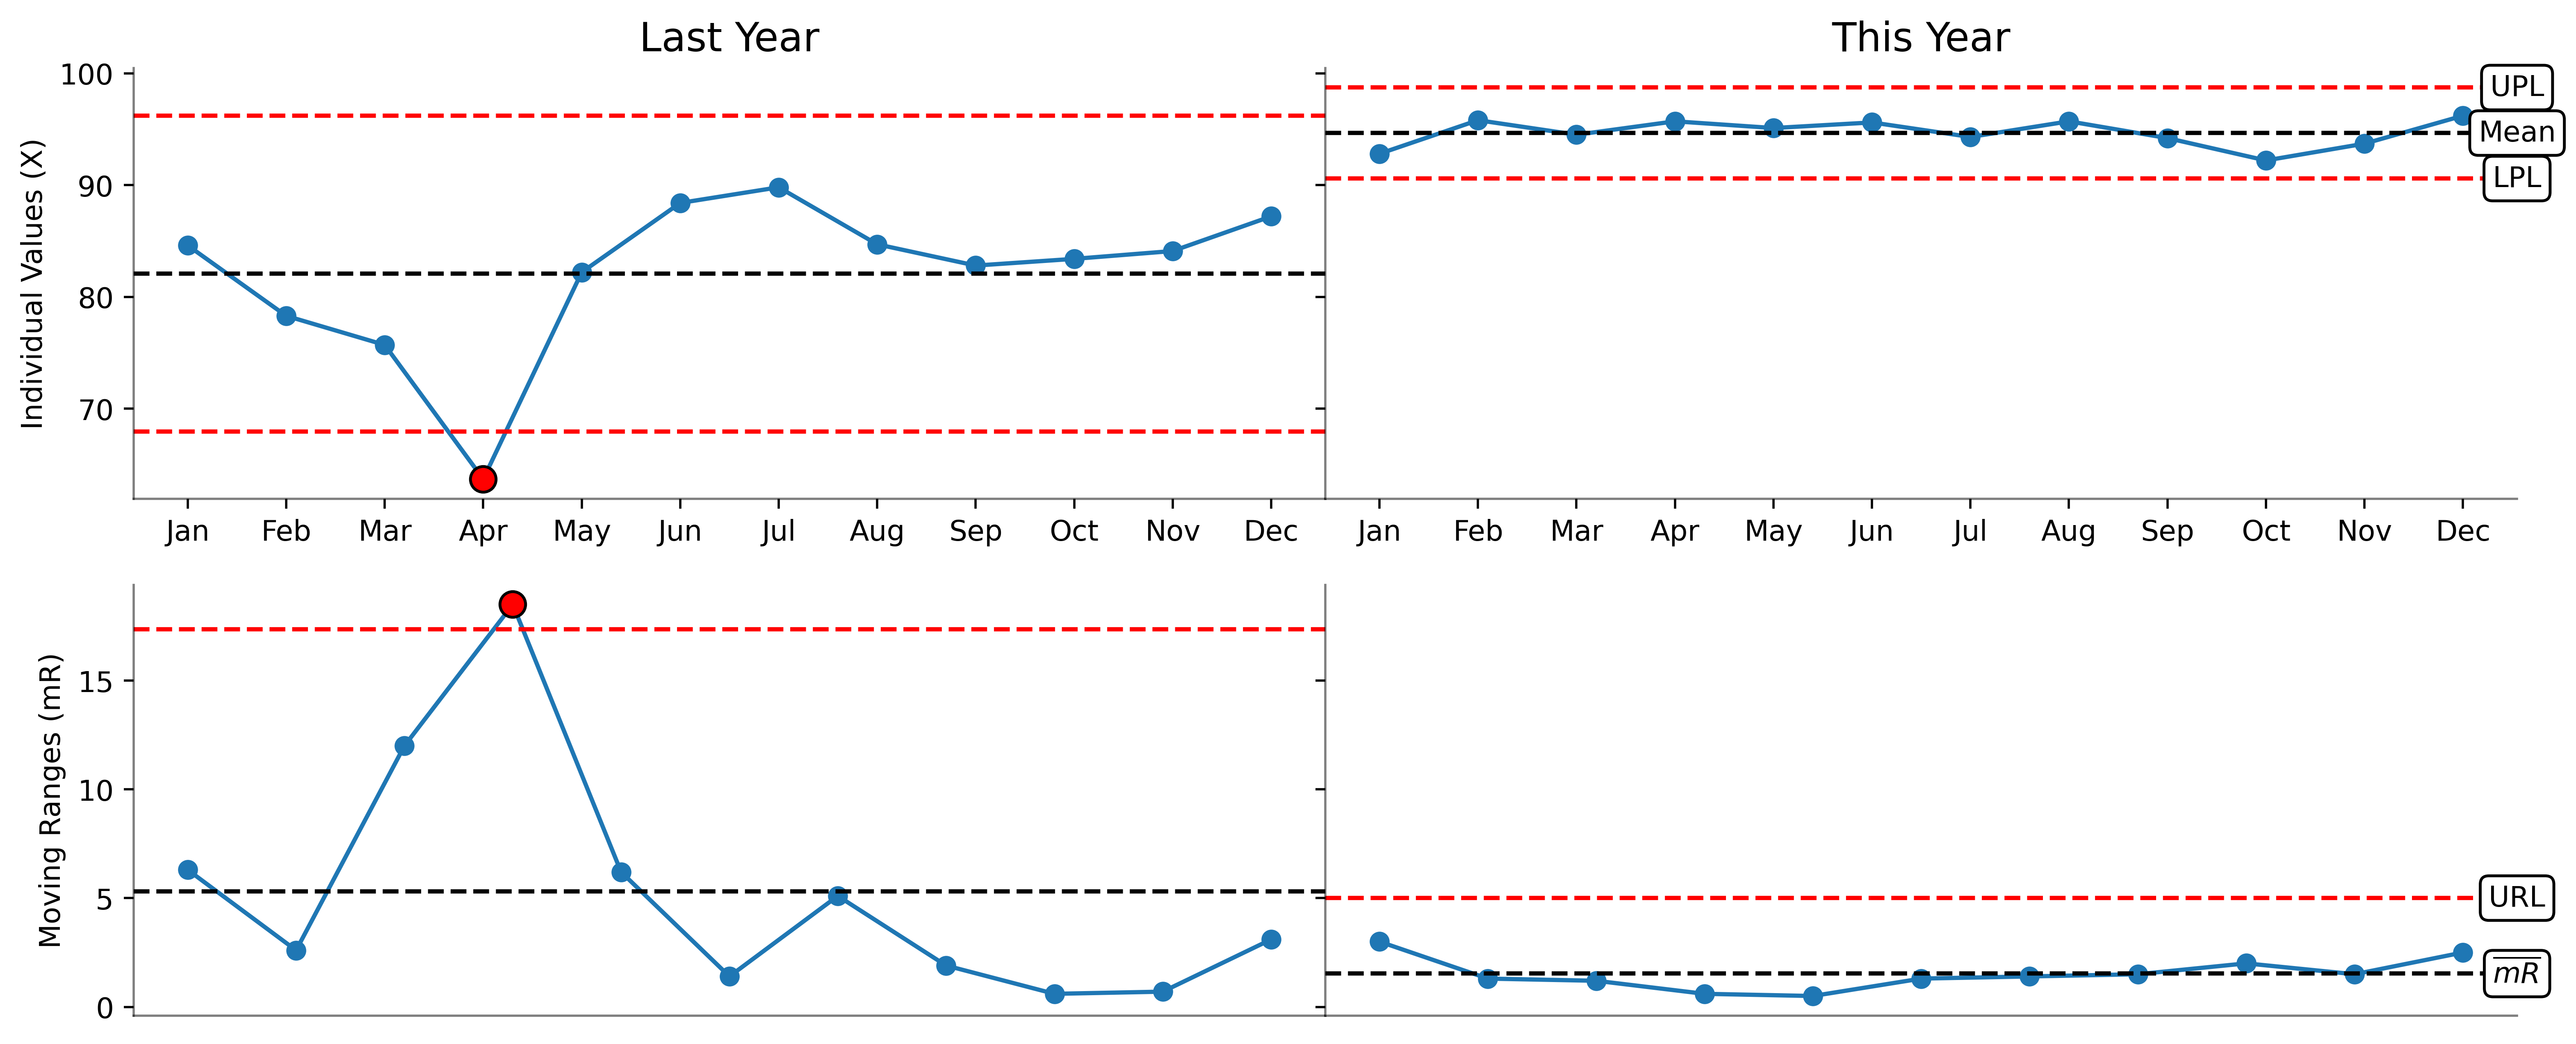

In [143]:
rcr_comparison_results = cc.xmr_comparison(rcr_df_list, 
                                           'RCR', 
                                           'Month', 
                                           rcr_labels_list, 
                                           tickinterval=1)

In [144]:
# Show results
rcr_comparison_results

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,Last Year,82.08,5.31,96.2046,67.9554,17.35,28.2492,Unpredictable
1,This Year,94.65,1.53,98.7198,90.5802,5.00,8.1396,Predictable


## Fig 24.11: Bar chart of mean and process limit range

In [145]:
rcr_bar_chart = rcr_comparison_results[['Label','Mean','PLR']]
# Transpose rcr_bar_chart
rcr_bar_chart_T = rcr_bar_chart.T
# Make first column labels
rcr_bar_chart_T.columns = rcr_bar_chart_T.iloc[0]
rcr_bar_chart_T = rcr_bar_chart_T[1:]
# Stack rcr_bar_chart_T
rcr_bar_chart_T = (rcr_bar_chart_T
                   .stack()
                   .to_frame()
                   .reset_index()
                   .rename(columns={'level_0':'Statistic',0:'Value'}) )

# Show results
rcr_bar_chart_T

,Statistic,Label,Value
0,Mean,Last Year,82.08
1,Mean,This Year,94.65
2,PLR,Last Year,28.2492
3,PLR,This Year,8.1396


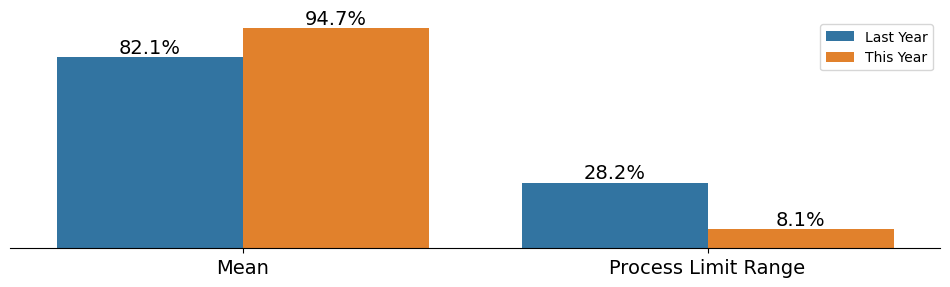

In [146]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(12,3))
# Plot data in bar chart
sns.barplot(data=rcr_bar_chart_T, x='Statistic', y='Value', hue='Label')

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=14)  
    
# Remove legend title
legend = plt.legend(title="")

# Remove axis labels
ax.set_xlabel('')
ax.set_ylabel('')
# Remove yaxis ticks
ax.yaxis.set_ticks([])
# Create new labels for xaxis
new_labels = ['Mean', 'Process Limit Range']
# Apply new labels to xaxis
ax.xaxis.set_ticklabels(new_labels, fontsize=14)
# Despine figure
sns.despine(left=True)

plt.show()

# XmR Comparison testing

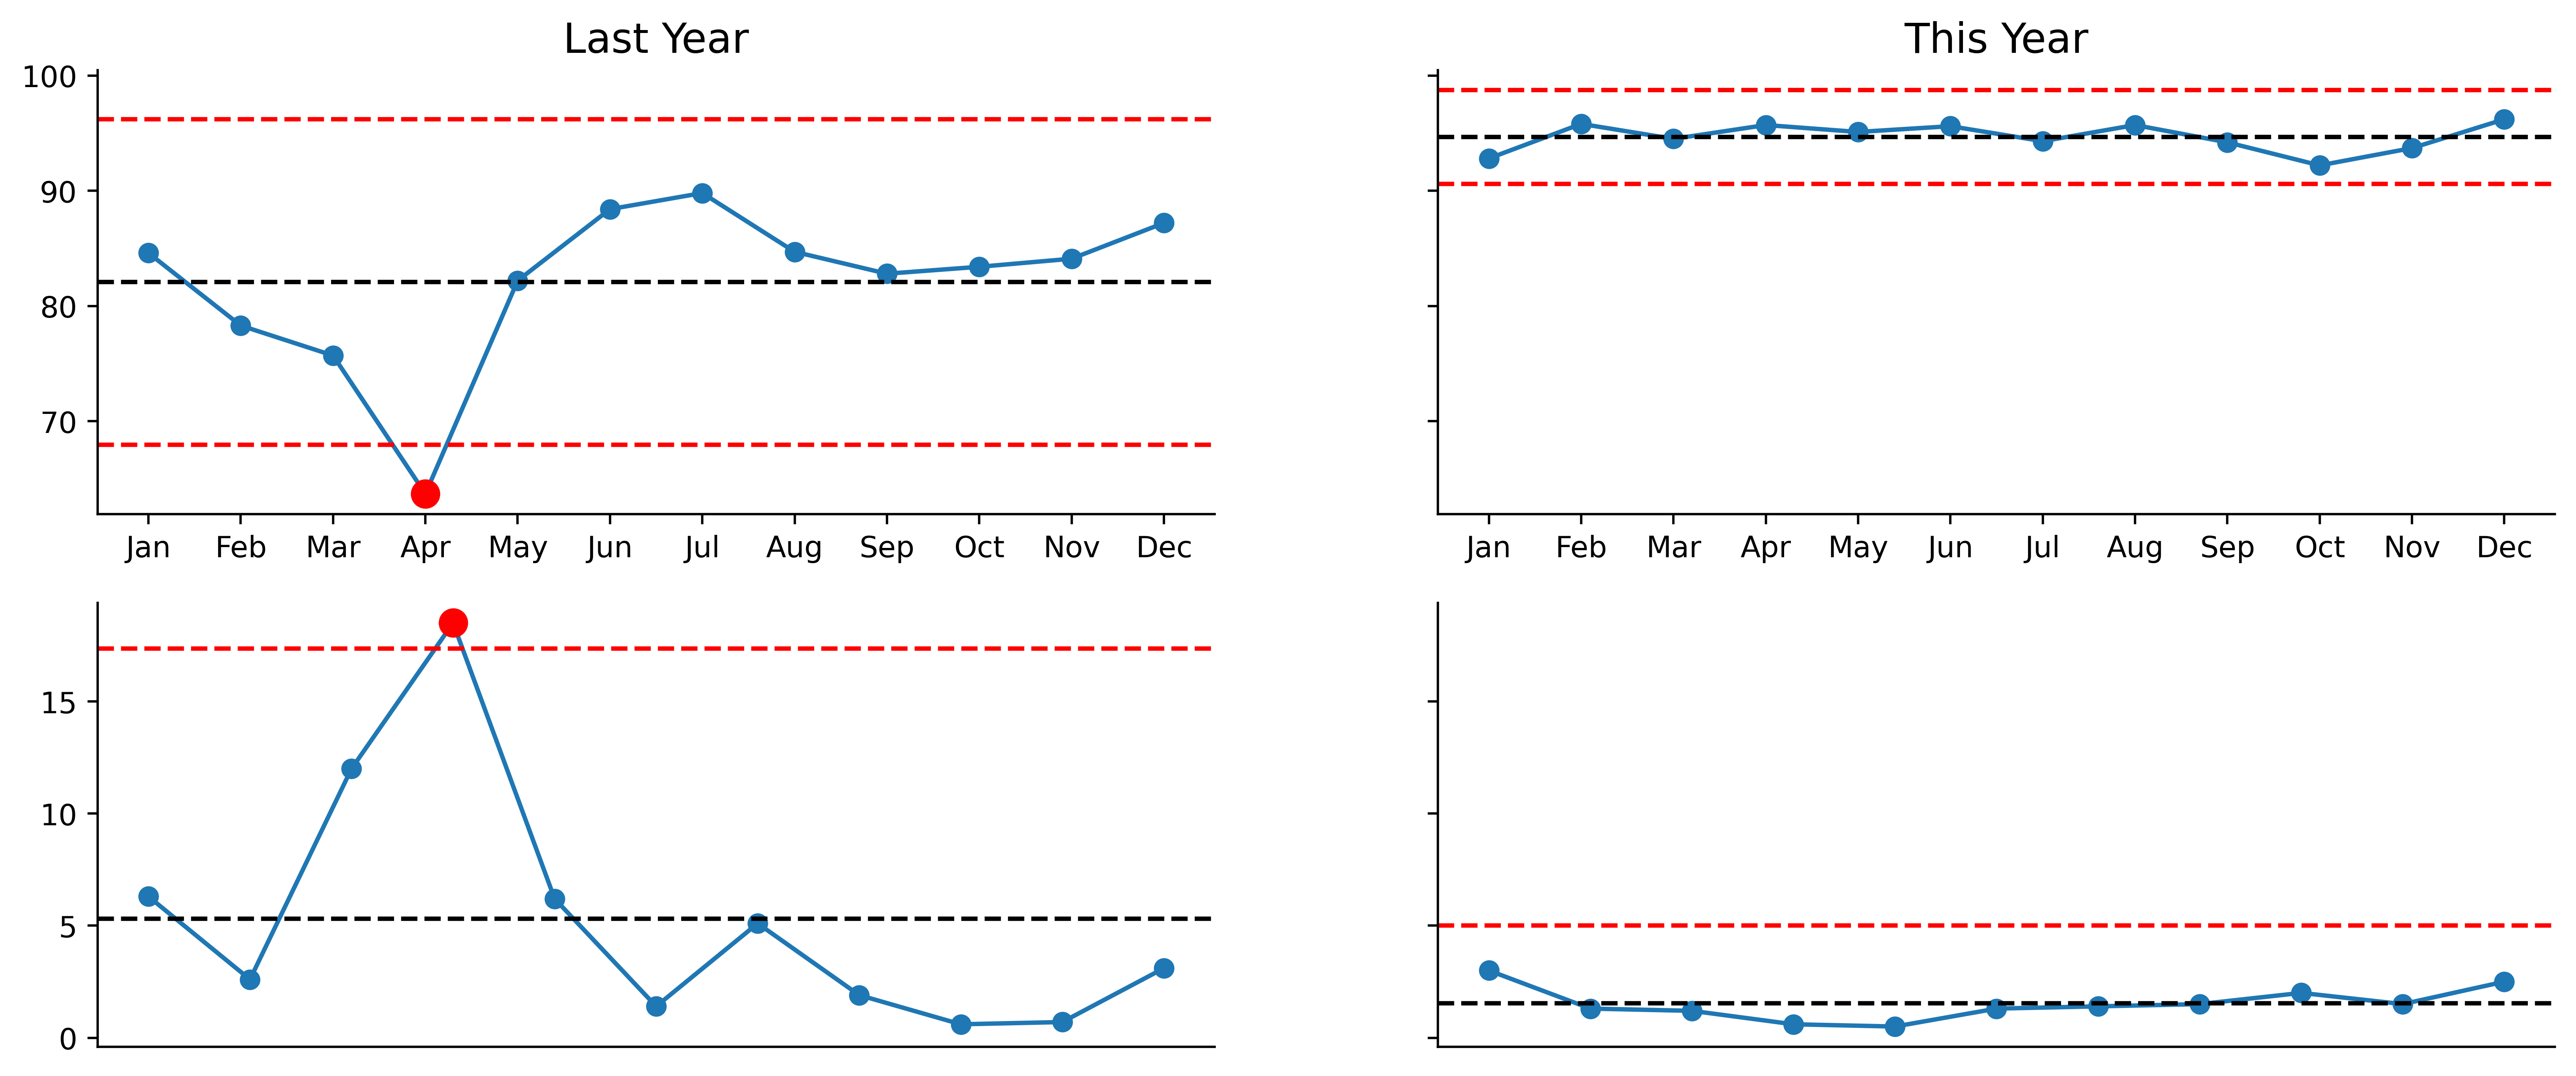

In [147]:
rcr_comparison_results = xmr_comparison(rcr_df_list, 
                                           'RCR', 
                                           'Month', 
                                           rcr_labels_list, 
                                           tickinterval=1)

In [148]:
def xmr_comparison(df_list, condition, xtick_labels, subplot_titles, 
                   figsize=(15, 6), tickinterval=5, round_value=2, 
                   dpi=500, show_limit_labels=True, restrict_UPL=False, restrict_LPL=True):

    # Validate df_list
    if not isinstance(df_list, list) or not all(isinstance(df, pd.DataFrame) for df in df_list):
        raise ValueError("df_list must be a list of pandas DataFrames.")

    n = len(df_list)  # Number of datasets
    cols = n  # Set the number of columns equal to the number of DataFrames
    rows = 2  # Always 2 rows (Top = Individual values, Bottom = Moving range)

    # Create figure with fixed columns (ensures only `n` subplots per row)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize, dpi=dpi, sharey='row')

    # If there's only one DataFrame, make sure axes are 2D arrays
    if n == 1:
        axes = np.array([[axes[0]], [axes[1]]])

    # Initialize stats list
    stats_list = []

    # Loop through each DataFrame and plot
    for idx, (df, title) in enumerate(zip(df_list, subplot_titles)):
        # Extract data
        data = df[condition]
        moving_range = round(abs(data.diff()), round_value)
        xticks = df[xtick_labels]

        # Constants for calculations
        C1, C2 = 2.660, 3.268
        mean = round(data.mean(), round_value)
        average_mR = round(moving_range.mean(), round_value)
        UPL = min(mean + C1 * average_mR, 100) if restrict_UPL else mean + (C1 * average_mR)
        LPL = max(mean - C1 * average_mR, 0) if restrict_LPL else mean - (C1 * average_mR)
        URL = round(C2 * average_mR, round_value)

        # Process characterization
        characterization = "Predictable"
        if ((data < LPL) | (data > UPL)).any() or (moving_range > URL).any():
            characterization = "Unpredictable"

        # Store stats
        stats_list.append({
            'Label': title, 'Mean': mean, 'Ave. mR': average_mR,
            'UPL': UPL, 'LPL': LPL, 'URL': URL, 'PLR': UPL - LPL, 'Characterization': characterization
        })

        # Get subplot axes
        ax_top = axes[0, idx]  # Top row: Individual values
        ax_bottom = axes[1, idx]  # Bottom row: Moving range

        # Plot individual values
        ax_top.plot(data, marker='o')
        ax_top.plot(np.ma.masked_where(data < UPL, data), marker='o', ls='none', color='red', markersize=9)
        ax_top.plot(np.ma.masked_where(data > LPL, data), marker='o', ls='none', color='red', markersize=9)
        ax_top.set_title(title, fontsize=14)
        ax_top.axhline(UPL, color='red', linestyle='--')
        ax_top.axhline(LPL, color='red', linestyle='--')
        ax_top.axhline(mean, color='black', linestyle='--')

        # Plot moving range
        ax_bottom.plot(moving_range, marker='o')
        ax_bottom.axhline(URL, color='red', linestyle='--')
        ax_bottom.axhline(average_mR, color='black', linestyle='--')
        ax_bottom.plot(np.ma.masked_where(moving_range < URL, moving_range), marker='o', ls='none', color='red', markersize=9)

        # Set x-ticks
        tick_positions = np.arange(0, len(xticks), tickinterval)
        ax_top.set_xticks(tick_positions)
        ax_top.set_xticklabels(xticks.iloc[tick_positions], rotation=0, ha='center')
        ax_bottom.set_xticks([])  # Remove x-ticks from moving range charts
    
    # Despine
    sns.despine()
#     plt.tight_layout()
    plt.show()

    # Convert stats to DataFrame
    return pd.DataFrame(stats_list)

In [149]:
vienna_df_list = vienna_df_list[0:4]
len(vienna_df_list)

4

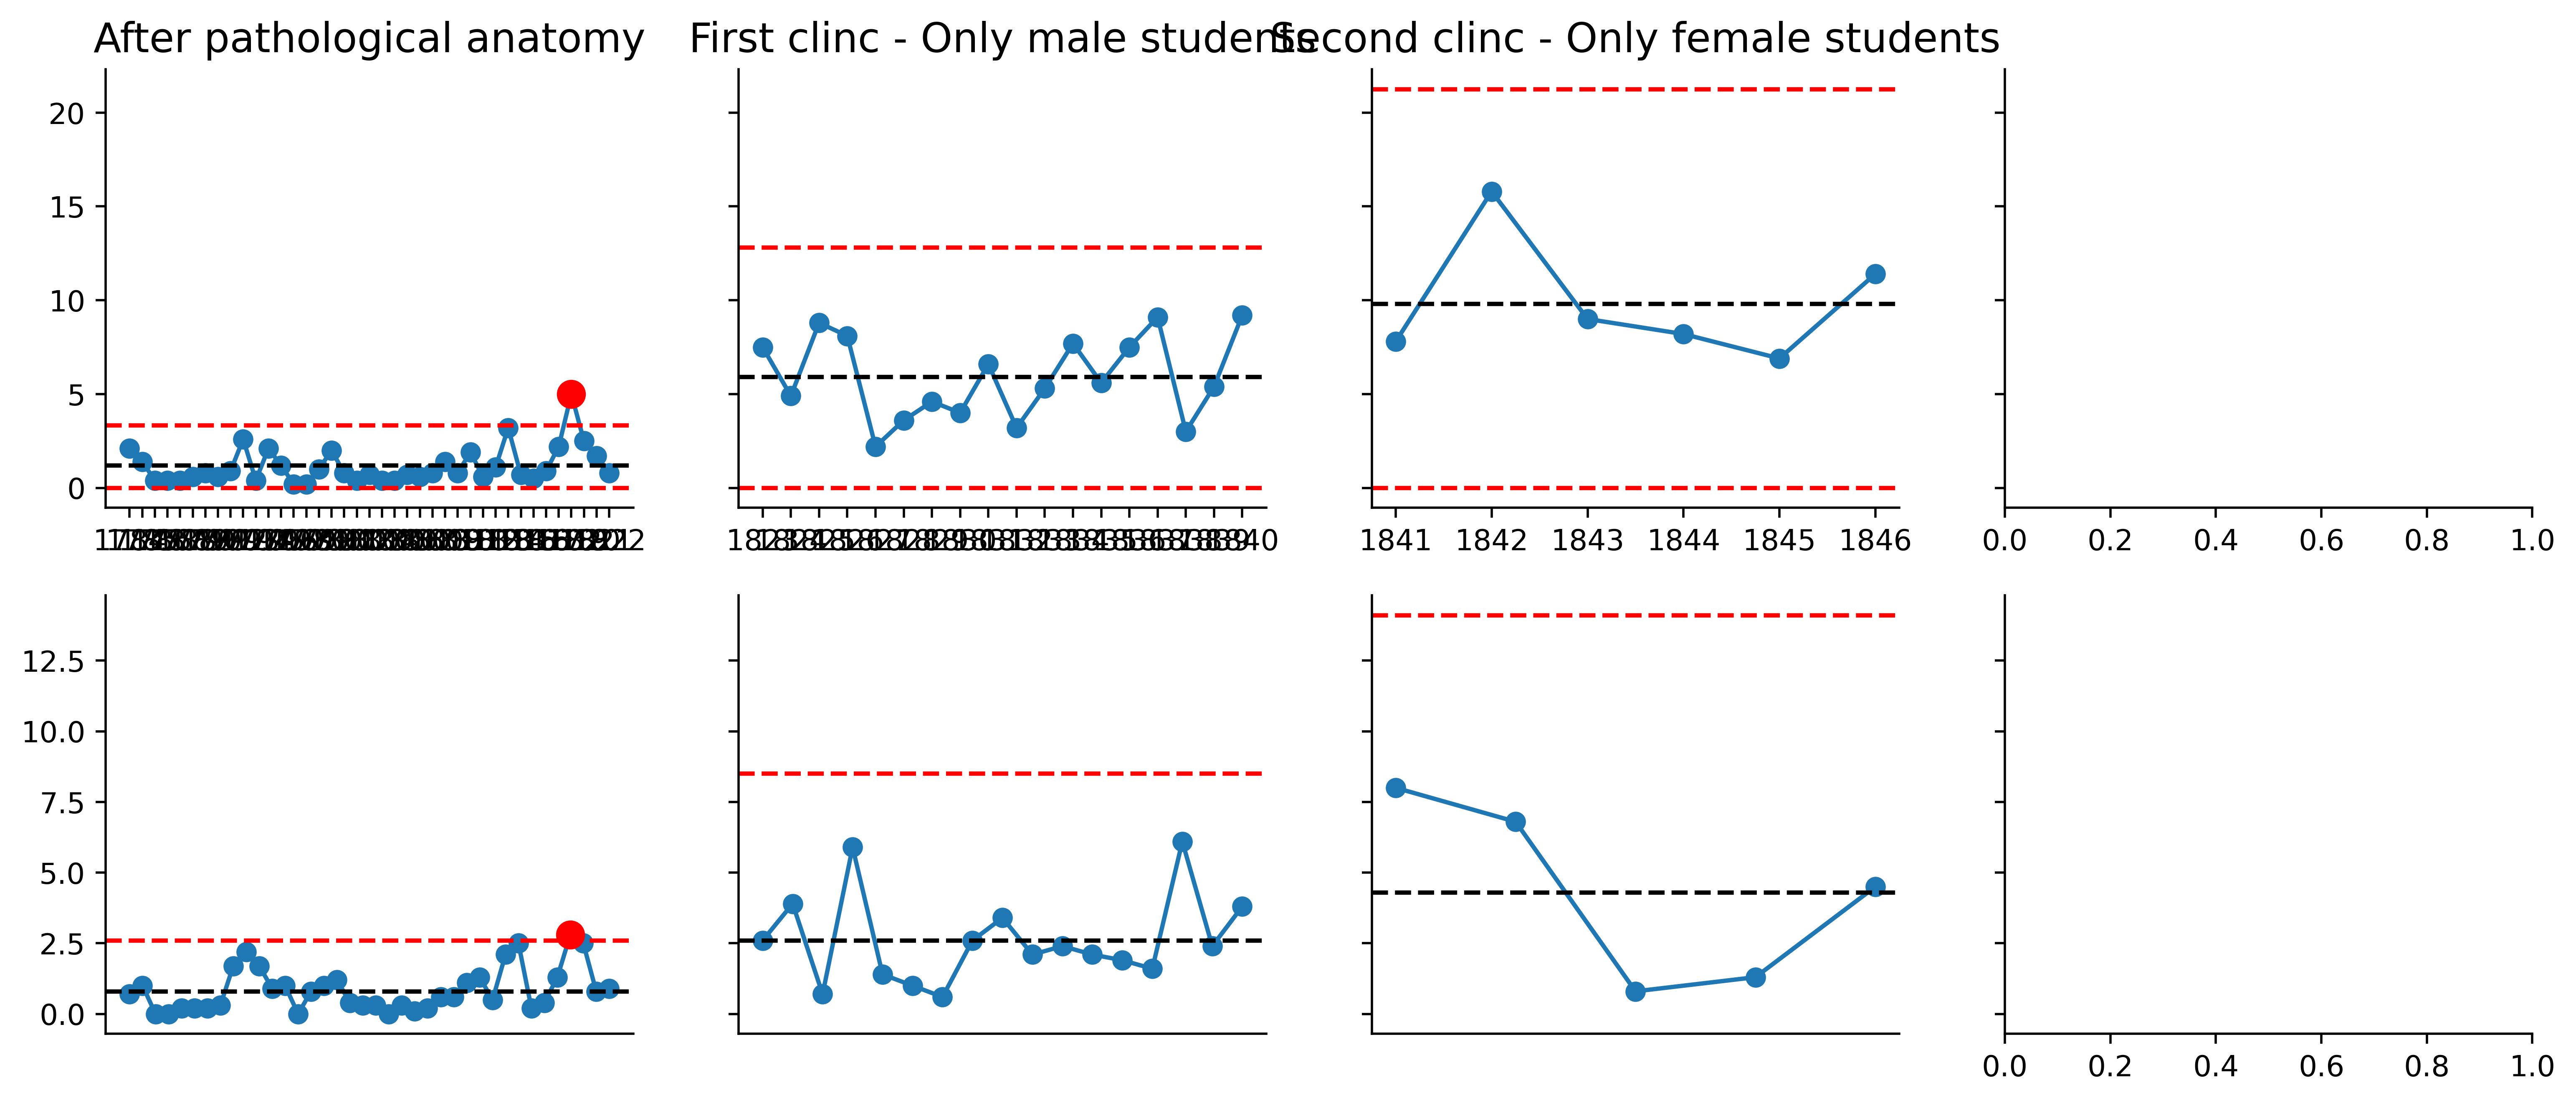

,Label,Mean,Ave. mR,UPL,LPL,URL,PLR,Characterization
0,After pathological anatomy,1.2,0.8,3.328,0,2.6,3.328,Unpredictable
1,First clinc - Only male students,5.9,2.6,12.816,0,8.5,12.816,Predictable
2,Second clinc - Only female students,9.8,4.3,21.238,0,14.1,21.238,Predictable


In [150]:
xmr_comparison(vienna_df_list, 
               'Death-to-Birth Ratio', 
               'Year', 
               ['After pathological anatomy',
                'First clinc - Only male students',
                'Second clinc - Only female students'],
                tickinterval=1, 
                round_value=1)